EXPLORING DATA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from CSV file
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
# Display the column names
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [16]:
# Display summary statistics
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [60]:
# Check for missing values in each column
df.isnull().sum()

price                     0
area                      0
bedrooms                  0
bathrooms                 0
stories                   0
mainroad                  0
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           0
parking                   0
prefarea                  0
furnishingstatus          0
AreaPerBedroom            0
BathroomToBedroomRatio    0
HasMainRoad               0
HasGuestroom              0
HasBasement               0
HasHotWaterHeating        0
HasAirConditioning        0
HasParking                0
HasPrefArea               0
AreaByStories             0
dtype: int64

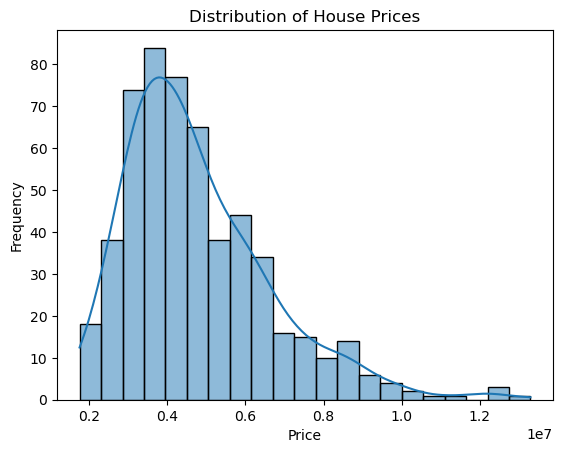

In [110]:
# Visualize the distribution of the target variable 'price'
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


PROCESSING DATA

In [30]:
# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Create new features
df['AreaPerBedroom'] = df['area'] / (df['bedrooms'].replace(0, np.nan))
df['BathroomToBedroomRatio'] = df['bathrooms'] / (df['bedrooms'].replace(0, np.nan))


In [54]:
# Assuming these columns are categorical with 'Yes' or 'No' values
# Convert categorical columns to binary
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
df['HasMainRoad'] = df['mainroad'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasGuestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasBasement'] = df['basement'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasHotWaterHeating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasAirConditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasParking'] = df['parking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasPrefArea'] = df['prefarea'].apply(lambda x: 1 if x == 'Yes' else 0)
df['AreaByStories'] = df['area'] * df['stories']
# Check the updated DataFrame
print(df.head())
print(df.dtypes)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  ...  AreaPerBedroom BathroomToBedroomRatio  \
0              no             yes  ...          1855.0               0.500000   
1              no             yes  ...          2240.0               1.000000   
2              no              no  ...          3320.0               0.666667   
3              no             yes  ...          1875.0               0.500000   
4              no             yes  ...          1855.0               0.250000   

  HasMainRoad  HasGuestroom  HasBaseme

SPLITTING DATA

In [64]:
from sklearn.model_selection import train_test_split

# Drop 'price' column for features and 'price' as the target variable
X = df.drop(['price'], axis=1, errors='ignore')
y = df['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LINEAR REGRESSION

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)

# Evaluate Linear Regression model
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))

Linear Regression Mean Squared Error: 1734423274068.0762
Linear Regression R2 Score: 0.6568603878208645


RANDOM FOREST REGRESSOR

In [124]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_y_pred))
print("Random Forest R2 Score:", r2_score(y_test, rf_y_pred))

Random Forest Mean Squared Error: 1929214287346.2173
Random Forest R2 Score: 0.61832278644547


SUPPORT VECTOR REGRESSOR

In [126]:
from sklearn.svm import SVR

# Initialize and train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

Voting Regressor

In [128]:
from sklearn.ensemble import VotingRegressor

# Initialize and train Voting Regressor
voting_model = VotingRegressor(estimators=[('linear', lin_model), ('rf', rf_model), ('svr', svr_model)])
voting_model.fit(X_train, y_train)
voting_y_pred = voting_model.predict(X_test)

# Evaluate Voting Regressor model
print("Voting Regressor Mean Squared Error:", mean_squared_error(y_test, voting_y_pred))
print("Voting Regressor R2 Score:", r2_score(y_test, voting_y_pred))

Voting Regressor Mean Squared Error: 2440646644074.764
Voting Regressor R2 Score: 0.5171406222254996


VISUALIZATION

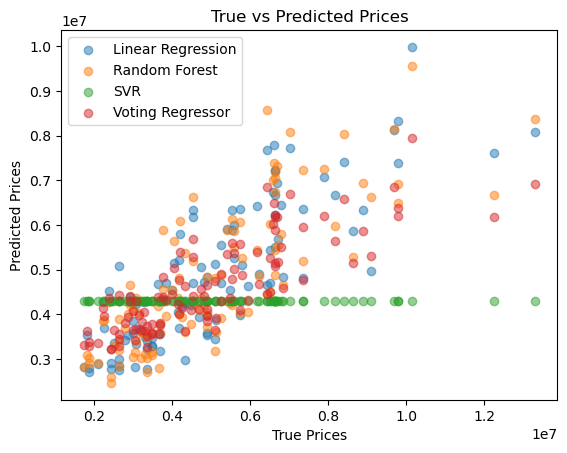

In [136]:
# Plot predictions
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, rf_y_pred, label='Random Forest', alpha=0.5)
plt.scatter(y_test, svr_y_pred, label='SVR', alpha=0.5)
plt.scatter(y_test, voting_y_pred, label='Voting Regressor', alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()